In [1]:
#!/usr/bin/python

#####################################################################
# This script presents SPECTATOR mode. In SPECTATOR mode you play and
# your agent can learn from it.
# Configuration is loaded from "../../examples/config/<SCENARIO_NAME>.cfg" file.
# 
# To see the scenario description go to "../../scenarios/README.md"
# 
#####################################################################
from __future__ import print_function
from vizdoom import *
from time import sleep

game = DoomGame()

In [2]:
# Choose scenario config file you wish to watch.
# Don't load two configs cause the second will overrite the first one.
# Multiple config files are ok but combining these ones doesn't make much sense.

game.load_config("../../examples/config/basic.cfg")

imgs = []
actions=[]
# game.load_config("../../examples/config/deadly_corridor.cfg")
# game.load_config("../../examples/config/deathmatch.cfg")
#game.load_config("../../examples/config/defend_the_center.cfg")
#game.load_config("../../examples/config/defend_the_line.cfg")
#game.load_config("../../examples/config/health_gathering.cfg")
#game.load_config("../../examples/config/my_way_home.cfg")
#game.load_config("../../examples/config/predict_position.cfg")
#game.load_config("../../examples/config/take_cover.cfg")

In [3]:
import numpy as np
from scipy.misc import toimage
images = np.empty([80,80,300])
# fp = np.memmap(filename, dtype='float32', mode='w+', shape=(3, 240, 320, 300,1000))
ep = 0
from PIL import Image
# index = np.empty([2, 1])
images = np.empty((80,80, 1))
index = np.zeros((1,2))
rew_step = [0]
actions = np.zeros((1,3))
rewards = [0]
# index.shape

In [4]:
# Enables spectator mode, so you can play. Sounds strange but it is agent who is supposed to watch not you.
game.set_window_visible(True)
game.set_mode(Mode.SPECTATOR)
frame_sk = 1

game.init()

episodes = 100
#     index = np.empty([1, 1])


print("")
for i in range(episodes):

    print("Episode #" +str(i+1))

    game.new_episode()
    while not game.is_episode_finished():

        s = game.get_state()
        img = s.image_buffer
        misc = s.game_variables

        game.advance_action()
        a = game.get_last_action()
        r = game.get_last_reward()
        
        if (s.number % frame_sk == 0):
            im_ar = np.array(toimage(img).resize((80,80), Image.ANTIALIAS).convert('L'))
            images = np.dstack((images, im_ar))
            actions = np.append(actions, np.atleast_2d(a), axis=0)
            rew_step.append(r)
            
            
            
        
#         imgs.append(img)
#         actions.append(a)

        #print("state #"+str(s.number))
        #print("game variables: ", misc)
        #print("action:", a)
        #print("reward:",r)
        #print("=====================")

    
    print("episode finished!")
    print("final index", (s.number - s.number %frame_sk)/frame_sk)
    ind = (s.number - s.number %frame_sk)/ frame_sk
    start_ind = 239
    if ep == 0:
        start_ind = 1
    else:
        start_ind = index[-1, 1]+1
    index = np.append(index, np.atleast_2d([start_ind,start_ind + ind -1]), axis=0)
    print("total reward:", game.get_total_reward())
    rewards.append(game.get_total_reward())
    print("************************")
    sleep(2.0)

    ep += 1

game.close()
# fp[:,:,:,:,ep] = images


Episode #1
episode finished!
final index 89
total reward: 12.0
************************
Episode #2
episode finished!
final index 77
total reward: 24.0
************************
Episode #3
episode finished!
final index 46
total reward: 55.0
************************
Episode #4
episode finished!
final index 43
total reward: 58.0
************************
Episode #5
episode finished!
final index 46
total reward: 55.0
************************
Episode #6
episode finished!
final index 58
total reward: 43.0
************************
Episode #7
episode finished!
final index 25
total reward: 76.0
************************
Episode #8
episode finished!
final index 46
total reward: 55.0
************************
Episode #9
episode finished!
final index 39
total reward: 62.0
************************
Episode #10
episode finished!
final index 58
total reward: 43.0
************************
Episode #11
episode finished!
final index 44
total reward: 57.0
************************
Episode #12
episode finished!

In [5]:
np.mean(rewards)

64.970297029702976

In [6]:
images.shape

(80, 80, 3509)

In [7]:
(actions.sum(axis = 1) != 0).sum()

1598

In [8]:
index = index.astype(int)
index

array([[   0,    0],
       [   1,   89],
       [  90,  166],
       [ 167,  212],
       [ 213,  255],
       [ 256,  301],
       [ 302,  359],
       [ 360,  384],
       [ 385,  430],
       [ 431,  469],
       [ 470,  527],
       [ 528,  571],
       [ 572,  616],
       [ 617,  681],
       [ 682,  721],
       [ 722,  768],
       [ 769,  798],
       [ 799,  821],
       [ 822,  847],
       [ 848,  895],
       [ 896,  937],
       [ 938,  984],
       [ 985, 1026],
       [1027, 1058],
       [1059, 1087],
       [1088, 1133],
       [1134, 1148],
       [1149, 1198],
       [1199, 1238],
       [1239, 1339],
       [1340, 1366],
       [1367, 1418],
       [1419, 1437],
       [1438, 1481],
       [1482, 1525],
       [1526, 1564],
       [1565, 1583],
       [1584, 1670],
       [1671, 1706],
       [1707, 1748],
       [1749, 1793],
       [1794, 1825],
       [1826, 1871],
       [1872, 1901],
       [1902, 1940],
       [1941, 1984],
       [1985, 2006],
       [2007,

In [ ]:
images[:,:,index[1,0]:index[1,1]+1]

In [ ]:
index[1,1]

In [9]:
actions_new = np.zeros((actions.shape[0], 4))

In [10]:
actions_new[:,1] = actions[:,2]
actions_new[:,2] = actions[:,1]
actions_new[:,3] = actions[:,0]
actions_new[:,0] = 1- np.sum(actions, axis = 1)

In [14]:
rew_step = map(int, rew_step)

In [19]:
import pickle
a = images[:,:,2:4]
string_rew = pickle.dumps(a)

In [20]:
pickle.loads(string_rew)

array([[[  59.,   59.],
        [  65.,   65.],
        [  64.,   64.],
        ..., 
        [  66.,   66.],
        [  61.,   61.],
        [  67.,   67.]],

       [[  74.,   74.],
        [  60.,   60.],
        [  52.,   52.],
        ..., 
        [  54.,   54.],
        [  69.,   69.],
        [  68.,   68.]],

       [[  45.,   45.],
        [  64.,   64.],
        [  38.,   38.],
        ..., 
        [  58.,   58.],
        [  57.,   57.],
        [  29.,   29.]],

       ..., 
       [[  73.,   73.],
        [  75.,   75.],
        [  93.,   93.],
        ..., 
        [ 142.,  142.],
        [  88.,   88.],
        [  60.,   60.]],

       [[  43.,   43.],
        [  59.,   59.],
        [ 107.,  107.],
        ..., 
        [ 119.,  119.],
        [  74.,   74.],
        [  57.,   57.]],

       [[  17.,   17.],
        [  32.,   32.],
        [  38.,   38.],
        ..., 
        [  35.,   35.],
        [  50.,   50.],
        [  45.,   45.]]])

In [22]:
import pandas as pd
df=pd.DataFrame(data = [pickle.dumps(images),pickle.dumps(index),  pickle.dumps(actions),
                        pickle.dumps(actions_new),pickle.dumps(rewards), pickle.dumps(rew_step)]).transpose()

In [43]:
df.loc[0,1]

'cnumpy.core.multiarray\n_reconstruct\np0\n(cnumpy\nndarray\np1\n(I0\ntp2\nS\'b\'\np3\ntp4\nRp5\n(I1\n(I101\nI2\ntp6\ncnumpy\ndtype\np7\n(S\'i8\'\np8\nI0\nI1\ntp9\nRp10\n(I3\nS\'<\'\np11\nNNNI-1\nI-1\nI0\ntp12\nbI00\nS\'\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x01\\x00\\x00\\x00\\x00\\x00\\x00\\x00Y\\x00\\x00\\x00\\x00\\x00\\x00\\x00Z\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xa6\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xa7\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xd4\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xd5\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\xff\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x01\\x00\\x00\\x00\\x00\\x00\\x00-\\x01\\x00\\x00\\x00\\x00\\x00\\x00.\\x01\\x00\\x00\\x00\\x00\\x00\\x00g\\x01\\x00\\x00\\x00\\x00\\x00\\x00h\\x01\\x00\\x00\\x00\\x00\\x00\\x00\\x80\\x01\\x00\\x00\\x00\\x00\\x00\\x00\\x81\\x01\\x00\\x00\\x00\\x00\\x00\\x00\\xae\\x01\\x00\\x00\\x00\\x00\\x00\\x00\\xaf\\x01\\x00\\x00\\x00\\x00\\x00\\x00\\xd5\\x01\\x00\\x00\\x00\\x00\\x00\\x00\\xd

In [24]:
with open('data.csv', 'a') as f:
    df.to_csv(f, header=False)

In [1]:
import pandas as pd
df_res = pd.read_csv("data.csv", header=None)

In [2]:
import pickle
images = pickle.loads(df_res.loc[0,1])

In [3]:
index = pickle.loads(df_res.loc[0,2])
actions = pickle.loads(df_res.loc[0,3])
actions_new = pickle.loads(df_res.loc[0,4])

In [4]:
%env THEANO_FLAGS='floatX=float32'
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

env: THEANO_FLAGS='floatX=float32'


In [5]:
import gym
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import theano.tensor as T
import theano
%matplotlib inline

Using gpu device 0: GeForce GTX 970 (CNMeM is enabled with initial size: 85.0% of memory, cuDNN 4007)


In [6]:
images = pickle.loads(df_res.loc[0,1])
images = np.rot90(np.flip(np.swapaxes(np.swapaxes(images, 2,0), 0,1),1),k=3)
print(images.shape,actions_new.shape)

((3509, 80, 80), (3509, 4))


In [7]:
sub_action = actions_new[actions_new[:,0] == 0, :]
sub_image = images[actions_new[:,0] == 0, :]
sub_image.shape

(1596, 80, 80)

In [8]:
import lasagne

input_X = T.tensor4("X")

#размерность входа (None означает "может изменяться")
input_shape = (1,80,80)

target_y = T.fmatrix("target Y integer")
output_shape = [None,4]

In [9]:
# #входной слой (вспомогательный)
# input_layer = lasagne.layers.InputLayer(shape = input_shape,input_var=input_X)

# #полносвязный слой, который принимает на вход input layer и имеет 100 нейронов.
# # нелинейная функция - сигмоида как в логистической регрессии
# # слоям тоже можно давать имена, но это необязательно
# dense_1 = lasagne.layers.DenseLayer(input_layer,num_units=50,
#                                    nonlinearity = lasagne.nonlinearities.sigmoid,
#                                    name = "hidden_dense_layer")

# #ВЫХОДНОЙ полносвязный слой, который принимает на вход dense_1 и имеет 10 нейронов -по нейрону на цифру
# #нелинейность - softmax - чтобы вероятности всех цифр давали в сумме 1
# dense_output = lasagne.layers.DenseLayer(dense_1,num_units = 4,
#                                         nonlinearity = lasagne.nonlinearities.softmax,
#                                         name='output')

In [10]:
from lasagne.init import GlorotUniform, Constant
from lasagne.layers import Conv2DLayer, InputLayer, DenseLayer, MaxPool2DLayer, get_output, get_all_params, \
    get_all_param_values, set_all_param_values
from lasagne.nonlinearities import rectify
from lasagne.objectives import squared_error
from lasagne.updates import rmsprop

input_layer = InputLayer(shape = (None,)+input_shape,input_var=input_X)

# Adds 3 convolutional layers, each followed by a max pooling layer.
dqn = Conv2DLayer(input_layer, num_filters=32, filter_size=[8, 8],
                  nonlinearity=rectify, W=GlorotUniform("relu"),
                  b=Constant(.1))
dqn = MaxPool2DLayer(dqn, pool_size=[2, 2])
dqn = Conv2DLayer(dqn, num_filters=64, filter_size=[4, 4],
                  nonlinearity=rectify, W=GlorotUniform("relu"),
                  b=Constant(.1))

dqn = MaxPool2DLayer(dqn, pool_size=[2, 2])
dqn = Conv2DLayer(dqn, num_filters=64, filter_size=[3, 3],
                  nonlinearity=rectify, W=GlorotUniform("relu"),
                  b=Constant(.1))
dqn = MaxPool2DLayer(dqn, pool_size=[2, 2])
# Adds a single fully connected layer.
dqn = DenseLayer(dqn, num_units=512, nonlinearity=rectify, W=GlorotUniform("relu"),
                 b=Constant(.1))

# Adds a single fully connected layer which is the output layer.
# (no nonlinearity as it is for approximating an arbitrary real function)
dense_output = DenseLayer(dqn,num_units = 4,
                                        nonlinearity = lasagne.nonlinearities.softmax,
                                        name='output')

In [11]:
#предсказание нейронки (theano-преобразование)
y_predicted = lasagne.layers.get_output(dense_output)

In [12]:
#все веса нейронки (shared-переменные)
all_weights = lasagne.layers.get_all_params(dense_output)
print (all_weights)

[W, b, W, b, W, b, W, b, output.W, output.b]


In [90]:
#функция ошибки - средняя кроссэнтропия
loss = lasagne.objectives.squared_error(y_predicted,target_y).mean()
# loss = ((y_predicted - target_y)**2).sum()

accuracy = lasagne.objectives.binary_accuracy(y_predicted,target_y).mean()

# #сразу посчитать словарь обновлённых значений с шагом по градиенту, как раньше
updates_sgd = lasagne.updates.sgd(loss, all_weights,learning_rate=0)

/home/user/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: You are creating a TensorVariable with float64 dtype. You requested an action via the Theano flag warn_float64={ignore,warn,raise,pdb}.


In [91]:
#функция, которая обучает сеть на 1 шаг и возвращащет значение функции потерь и точности
train_fun = theano.function([input_X,target_y],[loss,accuracy,y_predicted],updates= updates_sgd, allow_input_downcast=True)

#функция, которая считает точность
accuracy_fun = theano.function([input_X],y_predicted, allow_input_downcast=True)

In [92]:
accuracy_fun(np.random.rand(1,1,80,80))

array([[ 0.06092016,  0.07931311,  0.83562809,  0.02413866]], dtype=float32)

In [96]:
accuracy_fun([[images[2390]]])

array([[ 0.,  0.,  1.,  0.]], dtype=float32)

In [98]:
[[images[2390]]].shape()

AttributeError: 'list' object has no attribute 'shape'

In [81]:
np.expand_dims(sub_image, axis=1)[0]

array([[[  65.,   56.,   61., ...,   60.,   57.,   45.],
        [  63.,   53.,   35., ...,   88.,   74.,   50.],
        [  72.,   53.,   22., ...,  142.,  119.,   35.],
        ..., 
        [  60.,   74.,   52., ...,   93.,  107.,   38.],
        [  67.,   62.,   26., ...,   75.,   59.,   32.],
        [  79.,   52.,   24., ...,   73.,   43.,   17.]]])

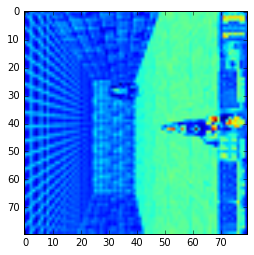

In [15]:
plt.imshow(images[550])

In [32]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    print("length input {} length targ {}".format(len(inputs), len(targets)))
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [26]:
images_4 = np.expand_dims(sub_image, axis=1)
actions_4 = np.expand_dims(sub_action, axis=1)
len(images_4) == len(sub_action)

True

In [60]:
images_4 = np.expand_dims(images, axis=1)
import time

num_epochs = 1000 #количество проходов по данным

batch_size = 500 #размер мини-батча

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_acc = 0
    train_batches = 0
    start_time = time.time()
    for batch in iterate_minibatches(np.expand_dims(images, axis=1), actions_new,batch_size):
        inputs, targets = batch
        train_err_batch, train_acc_batch, y_pred= train_fun(inputs, targets)
        train_err += train_err_batch
        train_acc += train_acc_batch
        train_batches += 1

#     # And a full pass over the validation data:
#     val_acc = 0
#     val_batches = 0
#     for batch in iterate_minibatches(X_val, y_val, batch_size):
#         inputs, targets = batch
#         val_acc += accuracy_fun(inputs, targets)
#         val_batches += 1

    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))

    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    print("  train accuracy:\t\t{:.2f} %".format(
        train_acc / train_batches * 100))
#     print("  validation accuracy:\t\t{:.2f} %".format(
#         val_acc / val_batches * 100))

length input 3509 length targ 3509
Epoch 1 of 1000 took 1.160s
  training loss (in-iteration):		0.415714
  train accuracy:		58.43 %
length input 3509 length targ 3509
Epoch 2 of 1000 took 1.244s
  training loss (in-iteration):		0.415714
  train accuracy:		58.43 %
length input 3509 length targ 3509
Epoch 3 of 1000 took 1.282s
  training loss (in-iteration):		0.415714
  train accuracy:		58.43 %
length input 3509 length targ 3509
Epoch 4 of 1000 took 1.263s
  training loss (in-iteration):		0.415714
  train accuracy:		58.43 %
length input 3509 length targ 3509
Epoch 5 of 1000 took 1.245s
  training loss (in-iteration):		0.415714
  train accuracy:		58.43 %
length input 3509 length targ 3509
Epoch 6 of 1000 took 1.247s
  training loss (in-iteration):		0.415714
  train accuracy:		58.43 %
length input 3509 length targ 3509


KeyboardInterrupt: 

In [73]:
(inputs[1] == inputs[300]).sum()

6191

In [68]:
inputs[239].reshape(80,80)

array([[  41.,   65.,   51., ...,   60.,   57.,   45.],
       [  49.,   64.,   30., ...,   88.,   74.,   50.],
       [  68.,   64.,   30., ...,  142.,  119.,   35.],
       ..., 
       [  39.,   70.,   67., ...,   93.,  107.,   38.],
       [  45.,   77.,   38., ...,   75.,   59.,   32.],
       [  70.,   71.,   28., ...,   73.,   43.,   17.]])

In [267]:
targets.shape

(50, 4)

In [76]:
n_actions = 4
state_dim = (80,80)

In [46]:
import theano
from theano import *
import theano.tensor as T

#create input variables. We'll support multiple states at once


current_states = T.matrix("states[batch,units]")
actions = T.ivector("action_ids[batch]")
rewards = T.vector("rewards[batch]")
next_states = T.matrix("next states[batch,units]")
is_end = T.ivector("vector[batch] where 1 means that session just ended")

In [47]:
import lasagne
from lasagne.layers import *

#input layer
l_states = InputLayer((80,80))

dense_1 = DenseLayer(l_states,num_units=100,
                                   name = "hidden_dense_layer")
#output layer
l_qvalues = DenseLayer(dense_1,num_units=n_actions,nonlinearity=None)
predicted_qvalues = get_output(l_qvalues,{l_states:current_states})

In [48]:
#get q-values for ALL actions in current_states

#compiling agent's "GetQValues" function
get_qvalues = theano.function([current_states], predicted_qvalues,
    allow_input_downcast=True)
#select q-values for chosen actions
predicted_qvalues_for_actions = predicted_qvalues[T.arange(actions.shape[0]),actions]

In [49]:
target_qvalues_for_actions = T.matrix("our actions")
my_inputs = {
    target_qvalues_for_actions: actions_new
}

In [50]:
#predict q-values for next states
predicted_next_qvalues = get_output(l_qvalues,{l_states:next_states})


#Computing target q-values under 
gamma = 0.99
# target_qvalues_for_actions = rewards + gamma* predicted_next_qvalues.max(axis= 1)
    
# #zero-out q-values at the end
# target_qvalues_for_actions = (1-is_end)*target_qvalues_for_actions

# #don't compute gradient over target q-values (consider constant)
# target_qvalues_for_actions = theano.gradient.disconnected_grad(target_qvalues_for_actions)

In [51]:
# target_qvalues_for_actions = T.matrix("our actions values")
#mean squared error loss function
loss = T.mean((predicted_qvalues_for_actions - target_qvalues_for_actions) ** 2)


In [52]:
#all network weights
all_weights = get_all_params(l_qvalues,trainable=True)

#network updates. Note the small learning rate (for stability)
updates = lasagne.updates.sgd(loss,all_weights,learning_rate=1e-4)

In [53]:
#Training function that resembles agent.update(state,action,reward,next_state) 
#with 1 more argument meaning is_end
train_step = theano.function([current_states,actions,next_states,is_end],
    allow_input_downcast=True,
                             updates=updates)

UnusedInputError: theano.function was asked to create a function computing outputs given certain inputs, but the provided input variable at index 2 is not part of the computational graph needed to compute the outputs: next states[batch,units].
To make this error into a warning, you can pass the parameter on_unused_input='warn' to theano.function. To disable it completely, use on_unused_input='ignore'.

In [31]:
epsilon = 0.25 #initial epsilon


def generate_session( num   ,t_max=300):
    """play env with approximate q-learning agent and train it at the same time"""
    
#     for i in range()
    total_reward = 0
    s = images[:,:,index[num,0]]
    
    for t in range(index[num,0]+1, index[num,1] + 1):
        
        #get action q-values from the network
        q_values = get_qvalues(s)[0] 
        
        if( np.random.random() < epsilon):
            a = np.random.choice(n_actions)
        else:
            a = np.argmax(q_values)
        
#         a = <sample action with epsilon-greedy strategy>
        
#         new_s,r,done,info = env.step(a)
        new_s = images[:,:,t]
#         r = rew_step[t]
        
        done = [(t == index[num,1] )]
        
        #train agent one step. Note that we use one-element arrays instead of scalars 
        #because that's what function accepts.
        train_step([s],[a],[new_s],[done])
        
        total_reward+=r
        
        s = new_s
#         if t = 
        if done: break
            
    return total_reward
        

In [32]:
# for i in range(100):
    
rewards = [generate_session(num = j) for j in range(index.shape[0])] #generate new sessions

epsilon*=0.95

print ("mean reward:%.3f\tepsilon:%.5f"%(np.mean(rewards),epsilon))

if np.mean(rewards) > 300:
    print ("You Win!")
    break

assert epsilon!=0, "Please explore environment"

NameError: global name 'train_step' is not defined

In [80]:
images[:,:,1]

array([[  59.,   65.,   64., ...,   66.,   61.,   67.],
       [  74.,   60.,   52., ...,   54.,   69.,   68.],
       [  45.,   64.,   38., ...,   58.,   57.,   29.],
       ..., 
       [  73.,   75.,   93., ...,  142.,   88.,   60.],
       [  43.,   59.,  107., ...,  119.,   74.,   57.],
       [  17.,   32.,   38., ...,   35.,   50.,   45.]])

In [182]:
tmp_im = images[:,:,1]

In [184]:
[tmp_im].shape

AttributeError: 'list' object has no attribute 'shape'

In [186]:
q_values = get_qvalues(tmp_im)

ValueError: dimension mismatch in args to gemm (80,80)x(6400,100)->(80,100)
Apply node that caused the error: GpuDot22(GpuFromHost.0, hidden_dense_layer.W)
Toposort index: 3
Inputs types: [CudaNdarrayType(float32, matrix), CudaNdarrayType(float32, matrix)]
Inputs shapes: [(80, 80), (6400, 100)]
Inputs strides: [(80, 1), (100, 1)]
Inputs values: ['not shown', 'not shown']
Outputs clients: [[GpuElemwise{Composite{(i0 * ((i1 + i2) + Abs((i1 + i2))))}}[(0, 1)](CudaNdarrayConstant{[[ 0.5]]}, GpuDot22.0, GpuDimShuffle{x,0}.0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [122]:
img_1 = images.reshape(images.shape[2], 80, 80)

img_1 = np.rot90(np.flip(np.swapaxes(images, 2,0),1),k=3)

In [125]:
np.rot90(img_1[0,:,:],k=3) == images[:,:,0]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

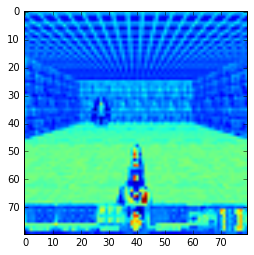

In [128]:
plt.imshow(np.rot90(img_1[14,:,:],k=3))

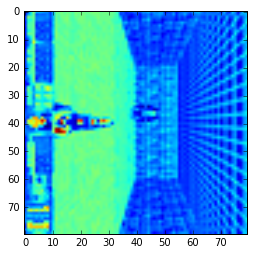

In [134]:
plt.imshow(images[:,14,:])

In [131]:
images = np.rot90(np.flip(np.swapaxes(np.swapaxes(images, 2,0), 0,1),1),k=3)

In [132]:
images.shape

(80, 3509, 80)